1. You are provided the titanic dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
Use the Logistic regression created from scratch (from the prev question) in this question as well.
Data cleaning plays a major role in this question. Report all the methods used by you in the ipynb.
-->

i. Check for missing values

ii. Drop Columns & Handle missing values

iii. Create dummies for categorical features

you are free to perform other data cleaning to improve your results.


In [2]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [3]:
!unzip SMAI_Log_reg_dataset.zip

Archive:  SMAI_Log_reg_dataset.zip
 extracting: SMAI_Log_reg_dataset/titanic.csv  
 extracting: SMAI_Log_reg_dataset/X.npy.zip  
 extracting: SMAI_Log_reg_dataset/Y.npy  


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # to split data into training sets and test sets

from sklearn.preprocessing import LabelEncoder  #for label encoding

In [5]:
#headers=['PassengerId','Survuved','PClass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
data = pd.read_csv('SMAI_Log_reg_dataset/titanic.csv', na_values='?', header=None,) 
#print(data)


new_header = data.iloc[0] 
data = data[1:] 
data.columns = new_header

data=data.drop(['Name', 'Ticket','Cabin','PassengerId'], axis = 1) 
#print(data)
#data.describe()
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Age'].fillna(data['Age'].median(), inplace=True)

##doing label encoding
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column

#data=pd.get_dummies(data, columns=["Embarked"])

data['Embarked_encoded'] = labelencoder.fit_transform(data['Embarked'])
data=data.drop(['Embarked'], axis = 1) 


data['Sex_encoded'] = labelencoder.fit_transform(data['Sex'])
data=data.drop(['Sex'], axis = 1) 

## doing NORMALISATION on Pclass,age,parch,fare,embarked_encoded
data['Pclass'] = pd.to_numeric(data['Pclass']) 
data["Pclass_normalised"]=((data["Pclass"]-data["Pclass"].min())/(data["Pclass"].max()-data["Pclass"].min()))*1
data=data.drop(['Pclass'], axis = 1) 

data['Age'] = pd.to_numeric(data['Age']) 
data["Age_normalised"]=((data["Age"]-data["Age"].min())/(data["Age"].max()-data["Age"].min()))*1
data=data.drop(['Age'], axis = 1) 

data['Parch'] = pd.to_numeric(data['Parch']) 
data["Parch_normalised"]=((data["Parch"]-data["Parch"].min())/(data["Parch"].max()-data["Parch"].min()))*1
data=data.drop(['Parch'], axis = 1) 


data['Fare'] = pd.to_numeric(data['Fare']) 
data["Fare_normalised"]=((data["Fare"]-data["Fare"].min())/(data["Fare"].max()-data["Fare"].min()))*1
data=data.drop(['Fare'], axis = 1) 

data['SibSp'] = pd.to_numeric(data['SibSp']) 
data["SibSp_normalised"]=((data["SibSp"]-data["SibSp"].min())/(data["SibSp"].max()-data["SibSp"].min()))*1
data=data.drop(['SibSp'], axis = 1) 


data['Embarked_encoded'] = pd.to_numeric(data['Embarked_encoded']) 
data["Embarked_normalised"]=((data["Embarked_encoded"]-data["Embarked_encoded"].min())/(data["Embarked_encoded"].max()-data["Embarked_encoded"].min()))*1
data=data.drop(['Embarked_encoded'], axis = 1) 

#print(data)
#data.describe()



In [6]:
y=data['Survived']
data=data.drop(['Survived'], axis = 1) 

In [7]:
print(data)
data.describe

0    Sex_encoded  Pclass_normalised  ...  SibSp_normalised  Embarked_normalised
1              1                1.0  ...             0.125                  1.0
2              0                0.0  ...             0.125                  0.0
3              0                1.0  ...             0.000                  1.0
4              0                0.0  ...             0.125                  1.0
5              1                1.0  ...             0.000                  1.0
..           ...                ...  ...               ...                  ...
887            1                0.5  ...             0.000                  1.0
888            0                0.0  ...             0.000                  1.0
889            0                1.0  ...             0.125                  1.0
890            1                0.0  ...             0.000                  0.0
891            1                1.0  ...             0.000                  0.5

[891 rows x 7 columns]


<bound method NDFrame.describe of 0    Sex_encoded  Pclass_normalised  ...  SibSp_normalised  Embarked_normalised
1              1                1.0  ...             0.125                  1.0
2              0                0.0  ...             0.125                  0.0
3              0                1.0  ...             0.000                  1.0
4              0                0.0  ...             0.125                  1.0
5              1                1.0  ...             0.000                  1.0
..           ...                ...  ...               ...                  ...
887            1                0.5  ...             0.000                  1.0
888            0                0.0  ...             0.000                  1.0
889            0                1.0  ...             0.125                  1.0
890            1                0.0  ...             0.000                  0.0
891            1                1.0  ...             0.000                  0.5

[891 

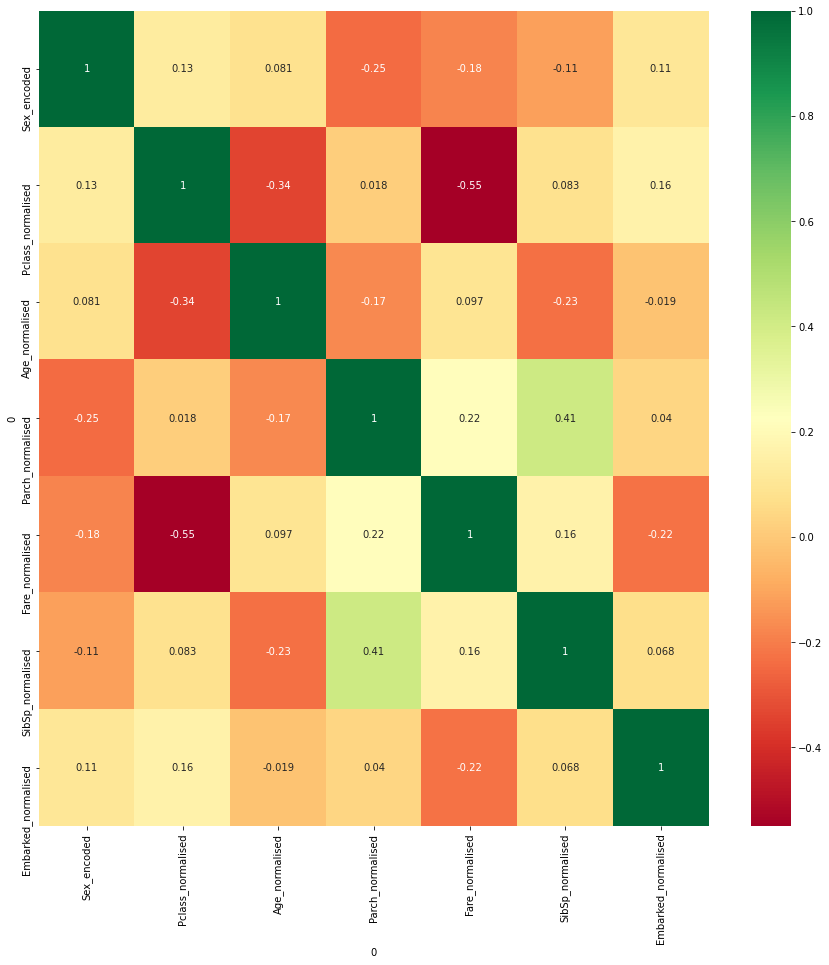

In [8]:
import seaborn as sns


corrmat=data.corr()
top_corr_features = corrmat.index 
#print(top_corr_features)
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


#print(data.shape)


In [ ]:
from random import seed

x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)

x_train=np.array(x_train).astype(np.float)
x_test=np.array(x_test).astype(np.float)
y_train=np.array(y_train).astype(np.float)
y_test=np.array(y_test).astype(np.float)


ones=np.ones(shape=x_train.shape[0]).reshape(-1,1)
x_train=np.concatenate((ones,x_train),1)

ones=np.ones(shape=x_test.shape[0]).reshape(-1,1)
x_test=np.concatenate((ones,x_test),1)

y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
# seed random number generator
seed(1)
#print(type(x_train))
length=len(x_train)
w=np.zeros(8)

#print(w)

w=w.reshape(-1,1)

#print(x_train.shape)
diff=[]
epoch=1500

alpha=0.01
for i in range(epoch):
  y_predict=1 / (1 + np.exp(-(np.dot(x_train,w)))) - 0.0000001
  cost=np.subtract(y_predict,y_train)
  diff.append(cost)
  t=[]
  t=np.dot(x_train.T,cost)
  t1=t*(alpha/len(y_train))
  w=w-t1
#print(w)

pred=[]
for i in range(len(x_test)):
  #hypo=np.dot(x_test[i],w)
  hypo=1 / (1 + np.exp(-(np.dot(x_test[i],w)))) - 0.0000001
  pred.append(hypo)

# print("************")
# print(len(pred))
# print(len(pred[0]))
# print("************")

for i in range(len(pred)):
  if pred[i]>=0.5:
    pred[i]=1
  else:
    pred[i]=0


accuracy=0
for i in range(len(y_test)):
  if y_test[i]==pred[i]:
    accuracy+=1

accuracy = accuracy/len(x_test)
#print(accuracy*100)
#print(pred)
#print(y_test)

Report accuracy score, Confusion matrix, heat map, classifiaction report and any other metrics you feel useful.

In [11]:
print("Accuracy Score :",end= " ")
print(accuracy)

Accuracy Score : 0.7723880597014925


In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[152,   5],
       [ 56,  55]])

In [13]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print("Classification report :")
print()
print(classification_report(y_test, pred, target_names=target_names))

Classification report :

              precision    recall  f1-score   support

     class 0       0.73      0.97      0.83       157
     class 1       0.92      0.50      0.64       111

    accuracy                           0.77       268
   macro avg       0.82      0.73      0.74       268
weighted avg       0.81      0.77      0.75       268

